### Visualize and compare a set of experiments
each experiment should be a yaml file

In [1]:
import yaml
import glob
import matplotlib.pyplot as plt

In [2]:
# assume they're all named the same thing
fname = "evaluate_results.yaml"
# and have a shared parent dir
parent_dir = "../out/Deep_LP_train/mnist/"
glob_str = parent_dir + "**/**/" + fname

In [3]:
files = glob.glob(glob_str, recursive=True)
print(files)

['../out/Deep_LP_train/mnist/lp_mnist_output_ab_1189798/1/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_output_ab_1189798/0/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_local_pooling_ab_1189805/1/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_local_pooling_ab_1189805/0/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_combo_quick_4_med_1193872/combo-quick-4-med_0/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/avgout-med/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/randout-med/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/control-med/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/maxout-med/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_med_1153406/2/evaluate_results.yaml', '../out/Deep_LP_train/mnist/lp_mnist_med_1153406/0/evaluate_results.yaml', '.

In [14]:
all_history = {}
for name in files:
    with open(name) as f:
        history = yaml.safe_load(f)
        if len(history) == 0:
            print(f"{name} is empty.")
            continue
        id = name.lstrip(parent_dir + "/").rstrip("/" + fname)
        for tst in history:
            ks = tst["transform"].keys()
            if len(ks) == 0:
                key = "normal"
                val = 1
            else:
                key = list(ks)[0]
                val = tst["transform"][key]
            d = all_history.get(key, {})
            my_dict = d.get(id, {})
            my_dict[val] = tst["acc"]
            d[id] = my_dict
            all_history[key] = d                

In [15]:
all_history

{'normal': {'lp_mnist_output_ab_1189798/1': {1: 0.9864217252396166},
  'lp_mnist_output_ab_1189798/0': {1: 0.9888178913738019},
  'lp_mnist_local_pooling_ab_1189805/1': {1: 0.985423322683706},
  'lp_mnist_local_pooling_ab_1189805/0': {1: 0.9885183706070287},
  'lp_mnist_combo_quick_4_med_1193872/combo-quick-4-med_0': {1: 0.9805311501597445},
  'lp_mnist_output_prelinear_ab_1191050/avgout-med': {1: 0.9857228434504792},
  'lp_mnist_output_prelinear_ab_1191050/randout-med': {1: 0.9752396166134185},
  'lp_mnist_output_prelinear_ab_1191050/control-med': {1: 0.9876198083067093},
  'lp_mnist_output_prelinear_ab_1191050/maxout-med': {1: 0.9839257188498403},
  'lp_mnist_med_1153406/0': {1: 0.9714456869009584},
  'lp_mnist_combo_quick_med_1193862/combo-quick-med_0': {1: 0.9819289137380192},
  'lp_mnist_combo_quick_augt_med_1193900/combo-quick-4-med-augt_0': {1: 0.9263178913738019},
  'lp_mnist_bn_dropout_ab_1189802/2': {1: 0.9843250798722045},
  'lp_mnist_bn_dropout_ab_1189802/1': {1: 0.98682108

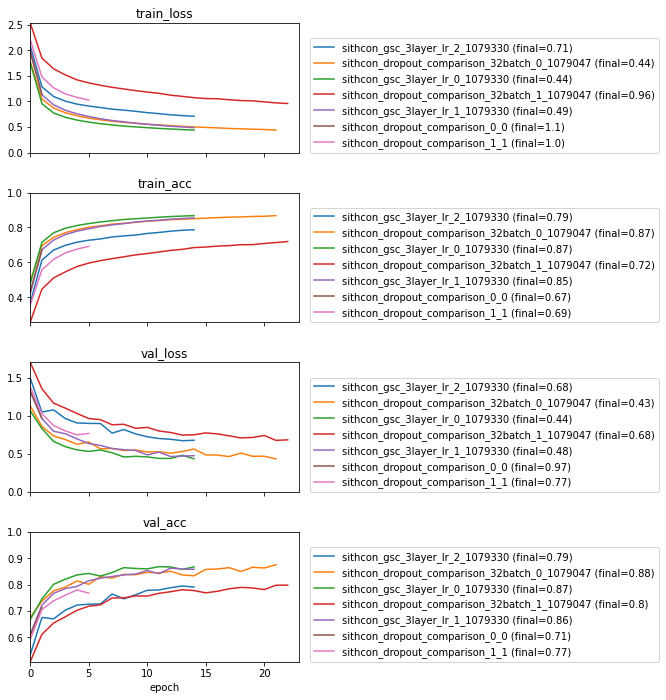

In [5]:
num_keys = len(all_history.keys())
num_runs = len(files)
f, ax = plt.subplots(num_keys, sharex=True, figsize=(5, 10))
f.tight_layout(pad=3.0)
for i, key in enumerate(all_history.keys()):
  runs = all_history[key]
  vals = runs.values()
  maxlen = max(map(len, vals))
  mx = max(map(max, vals))
  mn = min(map(min, vals))
  run_names = [*runs.keys()]
  ax[i].set_title(key)
  if "acc" in key.lower():
    mx = 1.0
  if "loss" in key.lower():
    mn = 0
  ax[i].set_xlim((0, maxlen))
  ax[i].set_ylim((mn, mx))
  for j, run_name in enumerate(run_names):
    x = runs[run_name]
    ax[i].plot(x, label=run_name)
    #point_x, point_y = len(x)-1, x[-1]
    run_names[j] = f"{run_name} (final={x[-1] :.2})"
    #ax[i].scatter(point_x, point_y, label=run_name)
    #ax[i].text(point_x-2, point_y, f"{point_y :.2}")
  ax[i].legend(run_names, loc=(1.04,0))

ax[-1].set_xlabel("epoch")

plt.show()